In [4]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [11]:
data = pd.read_csv('student-mat.csv', sep = ';')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [13]:
data = data[['studytime', 'absences', 'failures', 'G1', 'G2', 'G3']]
data.head()

,studytime,absences,failures,G1,G2,G3
0,2,6,0,5,6,6
1,2,4,0,5,5,6
2,2,10,3,7,8,10
3,3,2,0,15,14,15
4,2,4,0,6,10,10


In [14]:
X = data.drop('G3', axis = 1)
X

,studytime,absences,failures,G1,G2
0,2,6,0,5,6
1,2,4,0,5,5
2,2,10,3,7,8
3,3,2,0,15,14
4,2,4,0,6,10
...,...,...,...,...,...
390,2,11,2,9,9
391,1,3,0,14,16
392,1,3,3,10,8
393,1,0,0,11,12


In [15]:
X = np.array(X)

In [16]:
y = np.array(data['G3'])

In [17]:
X

array([[ 2,  6,  0,  5,  6],
       [ 2,  4,  0,  5,  5],
       [ 2, 10,  3,  7,  8],
       ...,
       [ 1,  3,  3, 10,  8],
       [ 1,  0,  0, 11, 12],
       [ 1,  5,  0,  8,  9]], dtype=int64)

In [58]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
'''
best = 0
for _ in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1 )
    ln = LinearRegression()
    ln.fit(x_train, y_train)
    acc = ln.score(x_train, y_train)
    print(acc)
    
    if acc > best:
        with open('StudentScoreBest.pickle', 'wb') as f:
            pickle.dump(ln, f)
'''
print(acc)



0.8285728433527848


0.8303147351092695

In [39]:
print('Coefficient: \n', ln.coef_)
print('Intercept: \n', ln.intercept_)

Coefficient: 
 [-0.14468705  0.04494971 -0.26586231  0.16800094  0.97136389]
Intercept: 
 -1.7134541622264035


In [40]:
Predictions = ln.predict(x_test)
for x in range(len(Predictions)):
    print(Predictions[x], x_test[x], y_test[x])

11.73781319977295 [ 3  1  0 13 12] 12
8.251455139495224 [2 0 0 9 9] 10
12.801234348105467 [ 1 10  1 11 13] 13
7.89758924725707 [ 2 10  0 10  8] 8
11.155708863899566 [ 3  3  0  9 12] 11
17.07699961922995 [ 4  0  0 17 17] 18
10.620084194707582 [ 2  2  0 11 11] 10
14.296079008684822 [ 2  4  0 15 14] 14
12.898813838681383 [ 2  2  0 13 13] 13
12.629397487666225 [ 1  4  0 10 13] 14
-1.717862083303524 [1 0 2 4 0] 0
10.600408332262766 [ 4  8  0 11 11] 10
16.316908304642084 [ 2  2  0 16 16] 16
14.728328309162917 [ 1  0  0 12 15] 15
9.832355055637032 [ 2 12  1 11 10] 10
10.620084194707582 [ 2  2  0 11 11] 11
15.177543482655183 [ 2  2  0 15 15] 16
13.928832772118938 [ 2 54  0 11 12] 11
4.131695022041272 [2 6 0 6 5] 6
10.194182909913057 [ 2  0  0  9 11] 12
14.749411988538858 [ 2 20  1 15 14] 13
16.148907367864098 [ 2  2  0 15 16] 16
8.419456076273208 [ 2  0  0 10  9] 0
9.199505136006398 [ 1  0  0  8 10] 11
14.942957023336392 [ 3  0  0 15 15] 15
13.924965360731985 [ 1  0  0 13 14] 14
7.806075889664

In [41]:
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [44]:
with open('StudentScorePredict.pickle', 'wb') as f:
    pickle.dump(ln, f)
pickle_in = open('StudentScorePredict.pickle', 'rb')
ln = pickle.load(pickle_in)

In [48]:
pickle_in

<_io.BufferedReader name='StudentScorePredict.pickle'>

In [49]:
pickle_in = open('StudentScorePredict.pickle', 'rb')
ln = pickle.load(pickle_in)

In [56]:
Predictions = ln.predict(x_test)
for x in range(len(Predictions)):
    print(Predictions[x], x_test[x], y_test[x])

15.707777607082082 [ 1  5  0 16 15] 16
11.977305870697165 [ 2  6  0 12 12] 12
13.669916386400303 [ 2 54  0 11 12] 11
15.747711538393123 [ 1  2  0 17 15] 15
10.477664448771629 [ 4  8  0 11 11] 10
12.04658079233029 [ 1  2  0 12 12] 11
6.251308576920271 [2 0 0 8 7] 8
15.213558877023655 [ 2  2  0 15 15] 14
12.899334296380125 [ 1  8  0 16 12] 13
14.602404240231335 [ 3  0  0 13 15] 15
8.356042987256416 [2 0 0 9 9] 10
10.336016256497752 [ 2 14  0 12 10] 11
15.114942965068447 [ 4  7  0 16 15] 17
14.169635197445118 [ 3  6  0 15 14] 14
11.011817110141097 [ 3  8  0 13 11] 11
5.988950243438743 [2 0 3 5 8] 7
7.532532292957477 [ 2 12  0  7  8] 8
9.484695696047531 [ 2  4  0  9 10] 10
9.874004403960638 [ 2  2  0 12 10] 11
5.344501797008369 [1 0 0 7 6] 0
4.145141222984513 [2 4 0 6 5] 6
5.48061216882929 [2 0 3 8 7] 0
6.98368181374571 [ 1 16  3  6  8] 8
10.14990360870192 [ 2  0  0  8 11] 11
19.058100632943233 [ 1  8  0 18 18] 18
12.953387572242193 [ 2  2  0 13 13] 13
12.72094870237402 [ 2  0  0 12 13] 14

In [55]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1 )
pickle_in1 = open('StudentScoreBest.pickle', 'rb')
ln = pickle.load(pickle_in1)

print('Coefficient: \n', ln.coef_)
print('Intercept: \n', ln.intercept_)

Predictions = ln.predict(x_test)
for x in range(len(Predictions)):
    print(Predictions[x], x_test[x], y_test[x])

Coefficient: 
 [-0.22327887  0.03850099 -0.2568988   0.15543689  0.97464876]
Intercept: 
 -1.36817013930251
15.707777607082082 [ 1  5  0 16 15] 16
11.977305870697165 [ 2  6  0 12 12] 12
13.669916386400303 [ 2 54  0 11 12] 11
15.747711538393123 [ 1  2  0 17 15] 15
10.477664448771629 [ 4  8  0 11 11] 10
12.04658079233029 [ 1  2  0 12 12] 11
6.251308576920271 [2 0 0 8 7] 8
15.213558877023655 [ 2  2  0 15 15] 14
12.899334296380125 [ 1  8  0 16 12] 13
14.602404240231335 [ 3  0  0 13 15] 15
8.356042987256416 [2 0 0 9 9] 10
10.336016256497752 [ 2 14  0 12 10] 11
15.114942965068447 [ 4  7  0 16 15] 17
14.169635197445118 [ 3  6  0 15 14] 14
11.011817110141097 [ 3  8  0 13 11] 11
5.988950243438743 [2 0 3 5 8] 7
7.532532292957477 [ 2 12  0  7  8] 8
9.484695696047531 [ 2  4  0  9 10] 10
9.874004403960638 [ 2  2  0 12 10] 11
5.344501797008369 [1 0 0 7 6] 0
4.145141222984513 [2 4 0 6 5] 6
5.48061216882929 [2 0 3 8 7] 0
6.98368181374571 [ 1 16  3  6  8] 8
10.14990360870192 [ 2  0  0  8 11] 11
19.0581

In [59]:
style.use('ggplot')

In [60]:
data.columns

Index(['studytime', 'absences', 'failures', 'G1', 'G2', 'G3'], dtype='object')

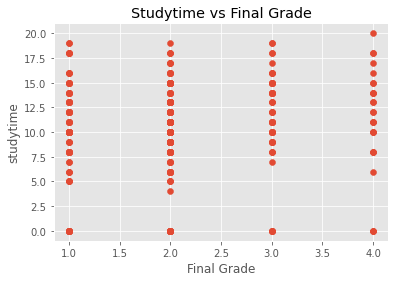

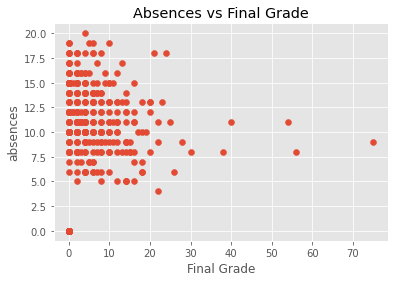

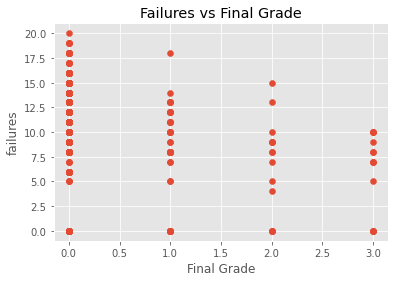

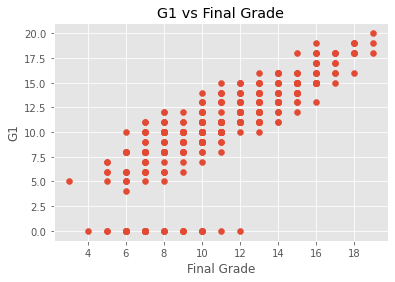

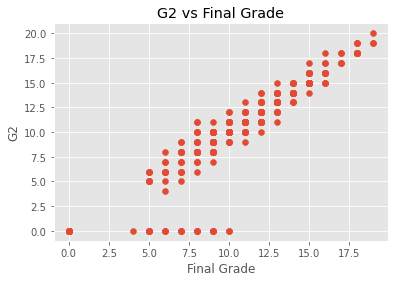

In [72]:
attr = [data['studytime'], data['absences'], data['failures'], data['G1'], data['G2']]
name = ['studytime', 'absences', 'failures','G1','G2']
title = ['Studytime vs Final Grade',
         'Absences vs Final Grade',
         'Failures vs Final Grade',
         'G1 vs Final Grade',
         'G2 vs Final Grade']
for x in range(5):
    plt.scatter(attr[x], data['G3'])
    plt.xlabel('Final Grade')
    plt.ylabel(name[x])
    plt.title(title[x])
    plt.show()

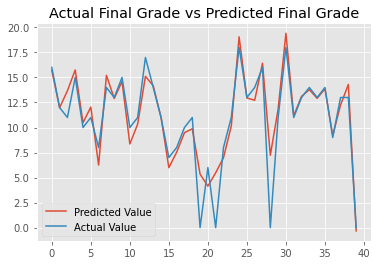

In [71]:
plt.plot(Predictions, label= 'Predicted Value')
plt.plot(y_test, label= 'Actual Value')
plt.title('Actual Final Grade vs Predicted Final Grade')
plt.legend()
plt.show()